In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
#toTensor converts image to numbers and scales it from (HWC)[0,255] to (CHW)[0,1]
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [7]:
#loading the data
trainset = datasets.MNIST(r'input\MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(r'input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting input\MNIST\MNIST\raw\train-images-idx3-ubyte.gz to input\MNIST\MNIST\raw


Extracting input\MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to input\MNIST\MNIST\raw


Extracting input\MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to input\MNIST\MNIST\raw


Extracting input\MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to input\MNIST\MNIST\raw
Processing...
Done!


torch.Size([64, 1, 28, 28]): This shows that there are 64 images in each batch, which has 1 color channel and 28x28 pixel dimensions.

torch.Size([64]): 64 images should have 64 labels associated with them.

In [13]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


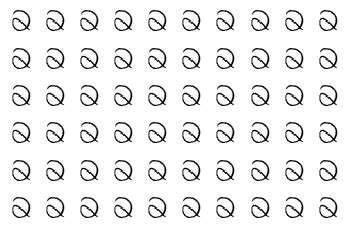

In [14]:
fig = plt.figure()
num_img = 60

for index in range(1,num_img+1):
    plt.subplot(6,10,index)
    plt.axis('off')
    plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

In [15]:
# Model creation with neural net Sequential model
model=nn.Sequential(nn.Linear(784,128), # 1 layer:- 784 input 128 o/p
                    nn.ReLU(),          # Defining Regular linear unit as activation
                    nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                    nn.Tanh(),          # Defining Regular linear unit as activation
                    nn.Linear(64,10),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                    nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                  ) 

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [17]:
# defining the negative log-likelihood loss for calculating loss
criterion = nn.NLLLoss() 
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL-loss
print(loss)

tensor(2.3249, grad_fn=<NllLossBackward>)


In [18]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() # to calculate gradients of parameter 
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 8.9453e-05,  8.9453e-05,  8.9453e-05,  ...,  8.9453e-05,
          8.9453e-05,  8.9453e-05],
        [ 1.4163e-03,  1.4163e-03,  1.4163e-03,  ...,  1.4163e-03,
          1.4163e-03,  1.4163e-03],
        [-2.6542e-04, -2.6542e-04, -2.6542e-04,  ..., -2.6542e-04,
         -2.6542e-04, -2.6542e-04],
        ...,
        [ 3.0830e-03,  3.0830e-03,  3.0830e-03,  ...,  3.0830e-03,
          3.0830e-03,  3.0830e-03],
        [ 4.0780e-03,  4.0780e-03,  4.0780e-03,  ...,  4.0780e-03,
          4.0780e-03,  4.0780e-03],
        [-6.3924e-03, -6.3924e-03, -6.3924e-03,  ..., -6.3924e-03,
         -6.3924e-03, -6.3924e-03]])


In [22]:
optimizer = optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()

#Forward propogation
output= model(images)
loss = criterion(output,labels)

#Backpropogation
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0127, -0.0211, -0.0160,  ..., -0.0224, -0.0226,  0.0221],
        [-0.0233, -0.0256,  0.0050,  ..., -0.0354, -0.0067,  0.0070],
        [ 0.0296, -0.0154,  0.0092,  ..., -0.0246, -0.0152, -0.0113],
        ...,
        [-0.0032, -0.0352, -0.0031,  ...,  0.0242,  0.0327, -0.0290],
        [ 0.0255,  0.0132,  0.0241,  ..., -0.0026, -0.0116,  0.0099],
        [-0.0082,  0.0114,  0.0052,  ...,  0.0103, -0.0122, -0.0015]],
       requires_grad=True)
Gradient - tensor([[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0011,  0.0011,  0.0011,  ...,  0.0011,  0.0011,  0.0011],
        [-0.0027, -0.0027, -0.0027,  ..., -0.0027, -0.0027, -0.0027],
        [-0.0035, -0.0035, -0.0035,  ..., -0.0035, -0.0035, -0.0035]])


In [23]:
epochs = 15
running_loss_list = []
epochs_list = []

for e in range(epochs):
    running_loss =0
    
    for images,labels in trainloader:
        # Flatenning MNIST images with size [64,784]
        images = images.view(images.shape[0], -1) 
        
        # defining gradient in each epoch as 0
        optimizer.zero_grad()
        
        # modeling for each image batch
        output = model(images)
        
        # calculating the loss
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        # calculating the loss
        running_loss += loss.item()
    
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

Epoch 0 - Training loss: 0.4134130588472525
Epoch 1 - Training loss: 0.17830000950623232
Epoch 2 - Training loss: 0.12910850298032958
Epoch 3 - Training loss: 0.10385629642051833
Epoch 4 - Training loss: 0.08619273674519443
Epoch 5 - Training loss: 0.0743280569938367
Epoch 6 - Training loss: 0.06547160837094365
Epoch 7 - Training loss: 0.05581605758072177
Epoch 8 - Training loss: 0.05082553138222688
Epoch 9 - Training loss: 0.0467255554559863
Epoch 10 - Training loss: 0.040517331261350625
Epoch 11 - Training loss: 0.036255648166416826
Epoch 12 - Training loss: 0.03168279932104925
Epoch 13 - Training loss: 0.030660282888103213
Epoch 14 - Training loss: 0.025687320217396368


In [24]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 5


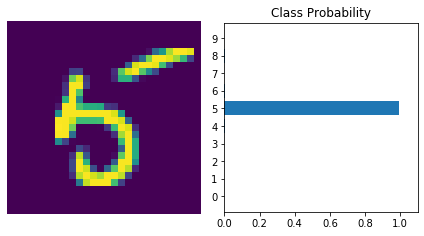

In [25]:
images, labels = next(iter(testloader))
# replace trainloader to check training accuracy.

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logpb = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [26]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9787


In [28]:
torch.save(model, 'digitclass/my_mnist_model.pt')